In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(1050, 1680)


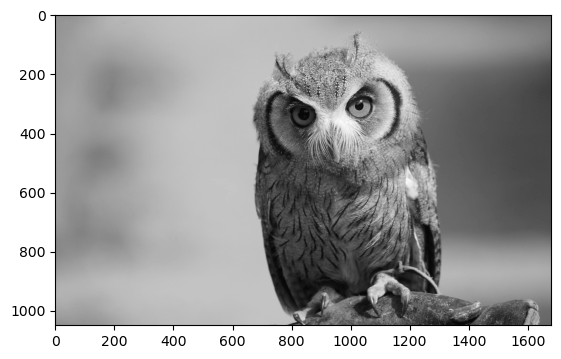

In [5]:
hewan = cv2.imread("hewan.jpg")
hewan = cv2.cvtColor(hewan, cv2.COLOR_BGR2GRAY)
print(hewan.shape)

plt.imshow(hewan, cmap="gray")

#202331015_Haidar Rafi Purnomo

In [7]:
#Menyiapkan Kernel konvolusi

kernel = np.array(([-1,0,-1],
                   [0,4,0],
                   [-1,0,-1]))

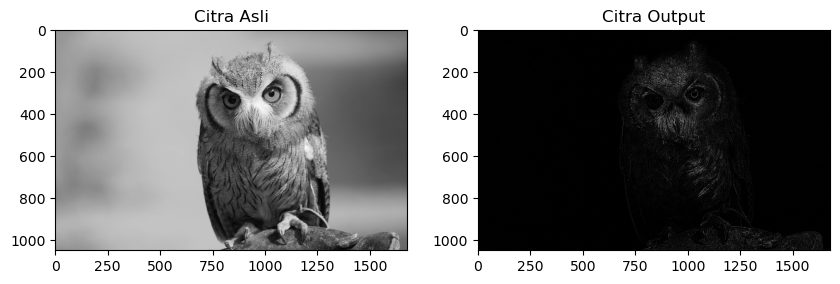

In [9]:
#Memproses Citra dengan konvolusi menggunakan FILTER2D

outputhewan = cv2.filter2D(hewan, -1, kernel)

fig, axs = plt.subplots(1,2,figsize=(10,10))
ax = axs.ravel()

ax[0].imshow(hewan, cmap="gray")
ax[0].set_title('Citra Asli')

ax[1].imshow(outputhewan, cmap="gray")
ax[1].set_title('Citra Output')

plt.show()

#202331015_Haidar Rafi Purnomo

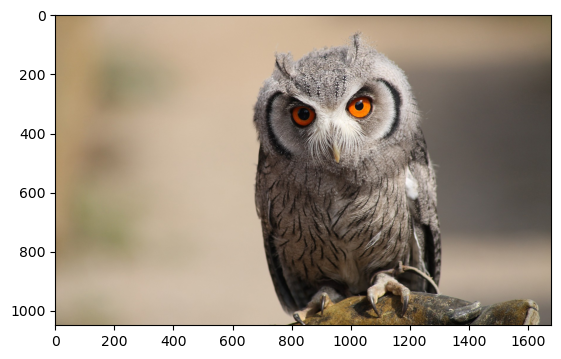

In [13]:
#Membaca dan menampilkan gambar citra.jpg

img = cv2.imread("hewan.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

#202331015_Haidar Rafi Purnomo

In [15]:
from skimage.util import random_noise

In [17]:
#add s&p noise to the image
noise_img_snp = random_noise(img, mode= "s&p", amount = 0.2)

#add gaussian noise to the image
noise_img_gaussian = random_noise(img, mode= "gaussian", mean=0, var=0.01)


#add speckle noise to the image
noise_img_speckle = random_noise(img, mode="speckle")


noise_img_snp = np.array(255*noise_img_snp, dtype = 'uint8')
noise_img_gaussian = np.array(255*noise_img_gaussian, dtype = 'uint8')
noise_img_speckle = np.array(255*noise_img_speckle, dtype = 'uint8')

#202331015_Haidar Rafi Purnomno

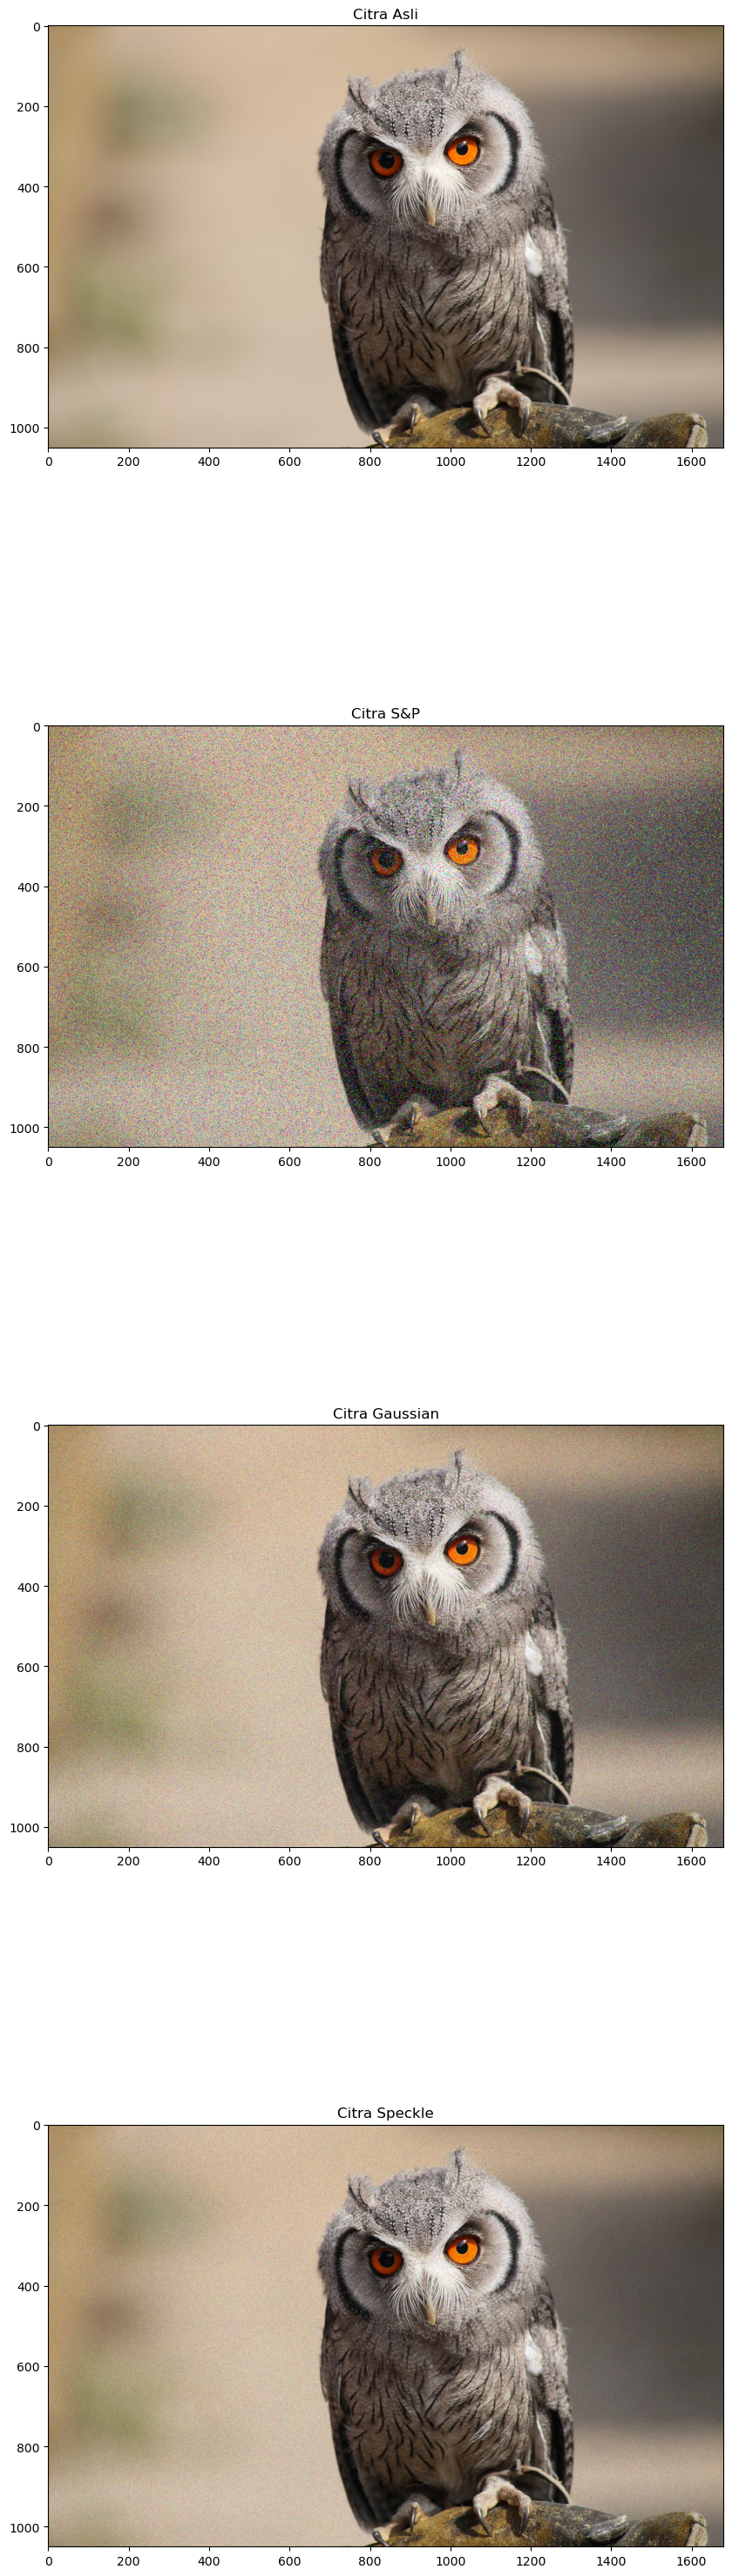

In [19]:
fig, axs = plt.subplots(4,1, figsize=(10,40))
ax = axs.ravel()

ax[0].imshow(img, cmap="gray")
ax[0].set_title('Citra Asli')

ax[1].imshow(noise_img_snp, cmap="gray")
ax[1].set_title('Citra S&P')

ax[2].imshow(noise_img_gaussian, cmap="gray")
ax[2].set_title('Citra Gaussian')

ax[3].imshow(noise_img_speckle, cmap="gray")
ax[3].set_title('Citra Speckle')

plt.show()

#202331015_Haidar Rafi Purnomo

In [21]:
#Membuat kernel 3*3 yang bernilai 1/9
#image_reduction

kernel_3_3 = np.ones((3,3), np.float32)/9

In [23]:
#Melakukan konvolusi untuk mengatasi noise salt dan pepper dengan function filter

img_snp_avg_filter = cv2.filter2D(noise_img_snp, cv2.CV_8U, kernel_3_3, (-1, -1), delta = 0, borderType = cv2.BORDER_DEFAULT)
img_snp_median_filter = cv2.medianBlur(noise_img_snp, 3)

In [25]:
#Melakukan konvolusi untuk mengatasi noise gaussian dengan function filter

img_gaussian_avg_filter = cv2.filter2D(noise_img_gaussian, cv2.CV_8U, kernel_3_3, (-1, -1), delta = 0, borderType = cv2.BORDER_DEFAULT)
img_gaussian_median_filter = cv2.medianBlur(noise_img_gaussian, 3)

In [27]:
#Melakukan konvolusi untuk mengatasi noise spackle dengan function filter

img_speckle_avg_filter = cv2.filter2D(noise_img_speckle, cv2.CV_8U, kernel_3_3, (-1, -1), delta = 0, borderType = cv2.BORDER_DEFAULT)
img_speckle_median_filter = cv2.medianBlur(noise_img_speckle, 3)

#202331015_Haidar Rafi Purnomo

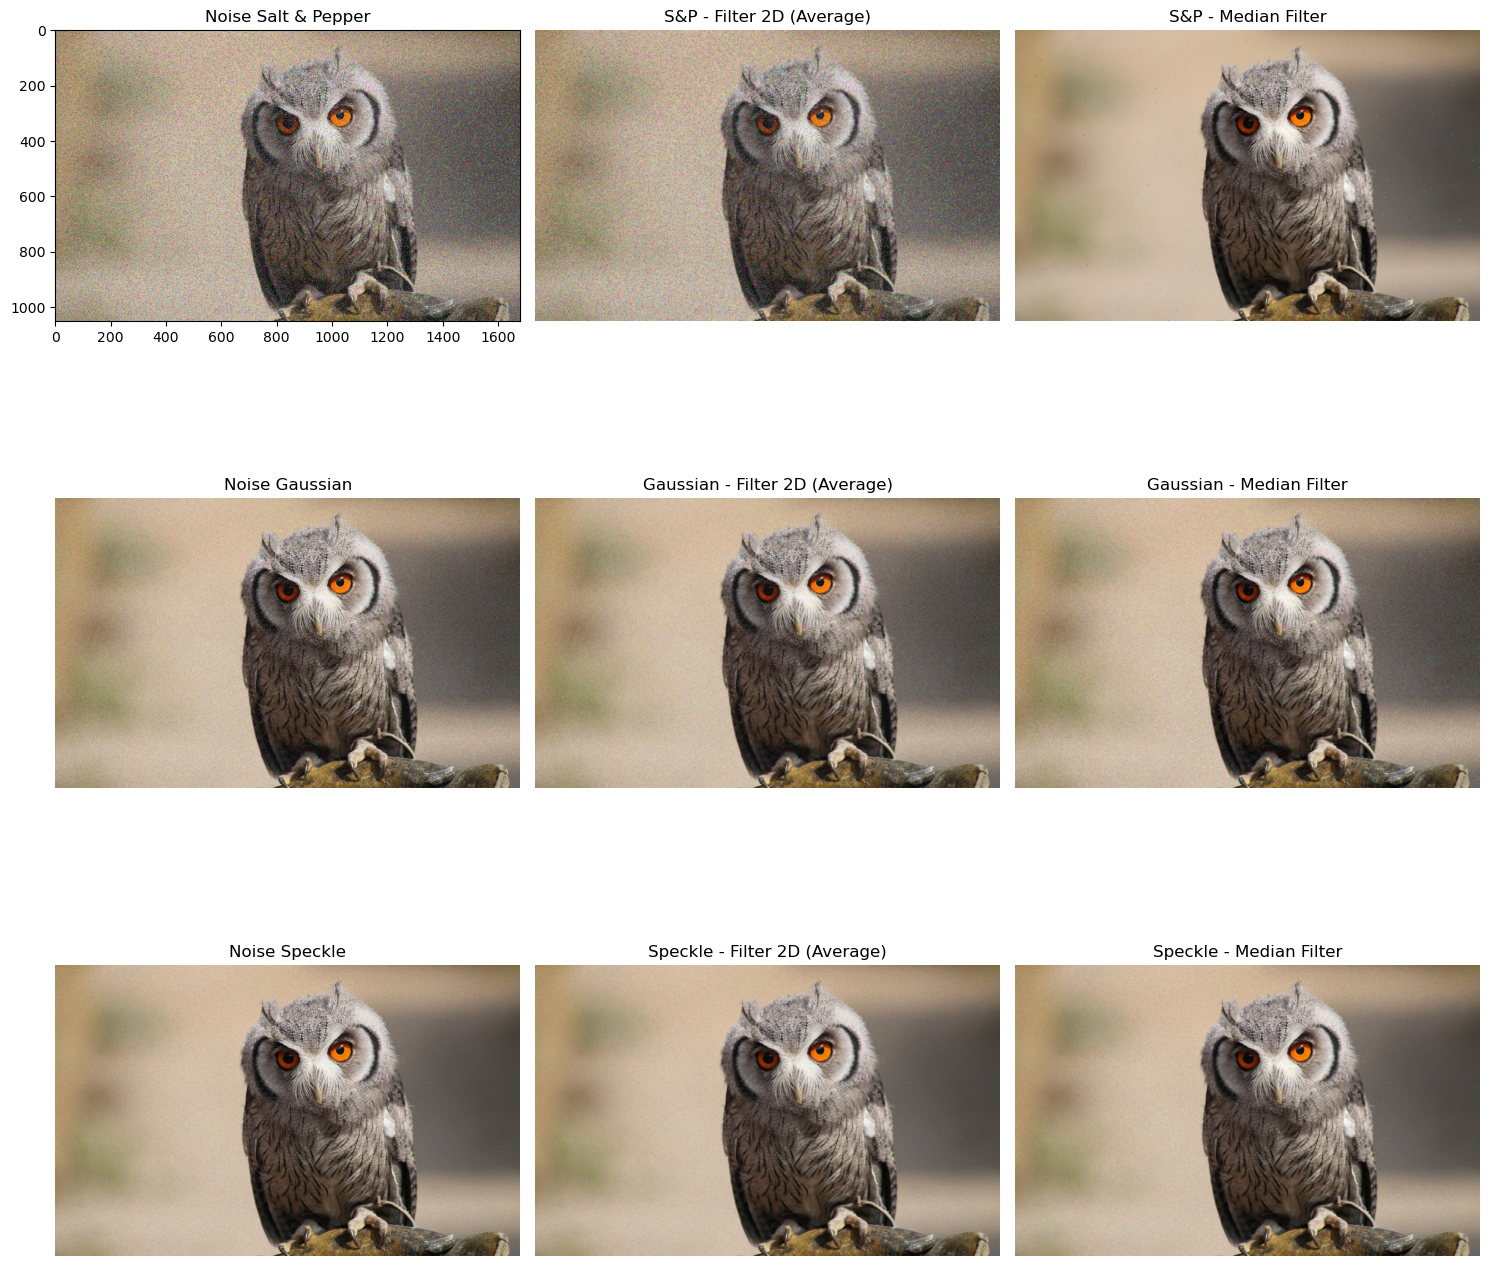

In [29]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
ax = axs.ravel()

# Baris 1: Salt & Pepper
ax[0].imshow(noise_img_snp, cmap="gray")
ax[0].set_title("Noise Salt & Pepper")
# ax[0].axis("off")

ax[1].imshow(img_snp_avg_filter, cmap="gray")
ax[1].set_title("S&P - Filter 2D (Average)")
ax[1].axis("off")

ax[2].imshow(img_snp_median_filter, cmap="gray")
ax[2].set_title("S&P - Median Filter")
ax[2].axis("off")

# Baris 2: Gaussian
ax[3].imshow(noise_img_gaussian, cmap="gray")
ax[3].set_title("Noise Gaussian")
ax[3].axis("off")

ax[4].imshow(img_gaussian_avg_filter, cmap="gray")
ax[4].set_title("Gaussian - Filter 2D (Average)")
ax[4].axis("off")
                                                        #202331015_Haidar Rafi Purnomo
ax[5].imshow(img_gaussian_median_filter, cmap="gray")
ax[5].set_title("Gaussian - Median Filter")
ax[5].axis("off")

# Baris 3: Speckle
ax[6].imshow(noise_img_speckle, cmap="gray")
ax[6].set_title("Noise Speckle")
ax[6].axis("off")

ax[7].imshow(img_speckle_avg_filter, cmap="gray")
ax[7].set_title("Speckle - Filter 2D (Average)")
ax[7].axis("off")

ax[8].imshow(img_speckle_median_filter, cmap="gray")
ax[8].set_title("Speckle - Median Filter")
ax[8].axis("off")

plt.tight_layout()
plt.show()